In [1]:
import pandas as pd
import json
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
bang_data = pd.read_excel('bangalore_cars.xlsx')
print(bang_data['new_car_detail'][0])
print(bang_data['new_car_detail'][0].replace("'", "\""))
json.loads(bang_data['new_car_detail'][0].replace("'", "\"").replace('None',"0"))

{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}
{"it": 0, "ft": "Petrol", "bt": "Hatchback", "km": "1,20,000", "transmission": "Manual", "ownerNo": 3, "owner": "3rd Owner", "oem": "Maruti", "model": "Maruti Celerio", "modelYear": 2015, "centralVariantId": 3979, "variantName": "VXI", "price": "₹ 4 Lakh", "priceActual": "", "priceSaving": "", "priceFixedText": None, "trendingText": {"imgUrl": "https://stimg.cardekho.com/used-cars/common/icons/trending.svg", "heading": "Trending Car!", "desc": "High chances of sale in next 6 days"}}


{'it': 0,
 'ft': 'Petrol',
 'bt': 'Hatchback',
 'km': '1,20,000',
 'transmission': 'Manual',
 'ownerNo': 3,
 'owner': '3rd Owner',
 'oem': 'Maruti',
 'model': 'Maruti Celerio',
 'modelYear': 2015,
 'centralVariantId': 3979,
 'variantName': 'VXI',
 'price': '₹ 4 Lakh',
 'priceActual': '',
 'priceSaving': '',
 'priceFixedText': 0,
 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg',
  'heading': 'Trending Car!',
  'desc': 'High chances of sale in next 6 days'}}

In [4]:
data_bang = []
for i in range(len(bang_data)):
    car_detail_json =  json.loads(bang_data['new_car_detail'][i].replace("'", "\"").replace('None',"0"))
    car_overview_json = json.loads(bang_data['new_car_overview'][i].replace("'", "\"").replace('None',"0"))
    car_specs_json = json.loads(bang_data['new_car_specs'][i].replace("'", "\"").replace('None',"0"))
    try:
        eng = car_specs_json['top'][1]['value']
    except:
        eng = 'Nan'

    data = dict(CITY = 'BANGALORE',
    OEM = car_detail_json['oem'],
    FUEL = car_detail_json['ft'],
    TYPE = car_detail_json['bt'],
    KM_TRAVELLED = car_detail_json['km'],
    TRANSMISSION = car_detail_json['transmission'],
    OWNER_NO = car_detail_json['ownerNo'],
    MODEL = car_detail_json['model'],
    REG_YEAR = car_detail_json['modelYear'],
    PRICE = car_detail_json['price'],
    INSURANCE = car_overview_json['top'][1]['value'],
    SEATS = car_overview_json['top'][3]['value'][0],
    ENGINE = eng,
    mileage = car_specs_json['top'][0]['value'],
    COLOR = car_specs_json['data'][0]['list'][0]['value'])
    data_bang.append(data)


In [5]:
df_bang = pd.DataFrame(data_bang)
df_bang

,CITY,OEM,FUEL,TYPE,KM_TRAVELLED,TRANSMISSION,OWNER_NO,MODEL,REG_YEAR,PRICE,INSURANCE,SEATS,ENGINE,mileage,COLOR
0,BANGALORE,Maruti,Petrol,Hatchback,"1,20,000",Manual,3,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,5,998 CC,23.1 kmpl,White
1,BANGALORE,Ford,Petrol,SUV,"32,706",Manual,2,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,5,1497 CC,17 kmpl,White
2,BANGALORE,Tata,Petrol,Hatchback,"11,949",Manual,1,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,5,1199 CC,23.84 kmpl,Red
3,BANGALORE,Hyundai,Petrol,Sedan,"17,794",Manual,1,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,5,1197 CC,19.1 kmpl,Others
4,BANGALORE,Maruti,Diesel,SUV,"60,000",Manual,1,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,5,1248 CC,23.65 kmpl,Gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,BANGALORE,Toyota,Diesel,SUV,"1,56,039",Manual,2,Toyota Fortuner,2012,₹ 16.49 Lakh,Comprehensive,7,2982 CC,12.55 kmpl,Blue
1477,BANGALORE,Maruti,Petrol,Sedan,"56,000",Manual,2,Maruti SX4,2008,₹ 3.30 Lakh,Third Party insurance,5,1586 CC,15 kmpl,Red
1478,BANGALORE,Honda,Petrol,Hatchback,"42,000",Manual,2,Honda Brio,2014,₹ 4.25 Lakh,Comprehensive,5,1198 CC,19.4 kmpl,White
1479,BANGALORE,Hyundai,Diesel,Hatchback,"93,003",Manual,1,Hyundai i20,2018,₹ 7.50 Lakh,Comprehensive,5,1396 CC,22.54 kmpl,Red


In [6]:
chennai_data = pd.read_excel('chennai_cars.xlsx')
data_chennai = []
for i in range(len(chennai_data)):
    car_detail_json =  json.loads(chennai_data['new_car_detail'][i].replace("'", "\"").replace('None',"0"))
    car_overview_json = json.loads(chennai_data['new_car_overview'][i].replace("'", "\"").replace('None',"0"))
    car_specs_json = json.loads(chennai_data['new_car_specs'][i].replace("'", "\"").replace('None',"0"))
    try:
        eng = car_specs_json['top'][1]['value']
    except:
        eng = 'Nan'

    data = dict(CITY = 'CHENNAI',
    OEM = car_detail_json['oem'],
    FUEL = car_detail_json['ft'],
    TYPE = car_detail_json['bt'],
    KM_TRAVELLED = car_detail_json['km'],
    TRANSMISSION = car_detail_json['transmission'],
    OWNER_NO = car_detail_json['ownerNo'],
    MODEL = car_detail_json['model'],
    REG_YEAR = car_detail_json['modelYear'],
    PRICE = car_detail_json['price'],
    INSURANCE = car_overview_json['top'][1]['value'],
    SEATS = car_overview_json['top'][3]['value'][0],
    ENGINE = eng,
    mileage = car_specs_json['top'][0]['value'],
    COLOR = car_specs_json['data'][0]['list'][0]['value'])
    data_chennai.append(data)


df_chennai = pd.DataFrame(data_chennai)
df_chennai

,CITY,OEM,FUEL,TYPE,KM_TRAVELLED,TRANSMISSION,OWNER_NO,MODEL,REG_YEAR,PRICE,INSURANCE,SEATS,ENGINE,mileage,COLOR
0,CHENNAI,Kia,Petrol,SUV,"20,000",Automatic,1,Kia Sonet,2022,₹ 11.50 Lakh,Third Party insurance,5,118.36bhp,998 CC,Black
1,CHENNAI,Maruti,Petrol,Minivans,"20,687",Manual,1,Maruti Eeco,2015,₹ 4.15 Lakh,Comprehensive,7,1196 CC,15.37 kmpl,Grey
2,CHENNAI,Nissan,Petrol,SUV,"30,000",Manual,1,Nissan Magnite,2021,₹ 7.50 Lakh,Third Party insurance,5,999 CC,20 kmpl,Others
3,CHENNAI,Hyundai,Petrol,Hatchback,"59,247",Manual,1,Hyundai i10,2015,₹ 3.98 Lakh,Comprehensive,5,1086 CC,19.81 kmpl,Silver
4,CHENNAI,Honda,Petrol,Hatchback,"50,000",Manual,1,Honda Jazz,2015,₹ 5.50 Lakh,Third Party insurance,5,1199 CC,18.7 kmpl,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,CHENNAI,Maruti,Petrol,Hatchback,"42,891",Automatic,1,Maruti Swift,2018,₹ 6.20 Lakh,Third Party insurance,5,1197 CC,22 kmpl,Blue
1415,CHENNAI,Renault,Diesel,SUV,"59,100",Manual,1,Renault Duster,2018,₹ 8.90 Lakh,Third Party insurance,5,1461 CC,19.87 kmpl,Orange
1416,CHENNAI,Tata,Petrol,SUV,"55,913",Automatic,1,Tata Nexon,2018,₹ 8.01 Lakh,Not Available,5,1198 CC,17 kmpl,White
1417,CHENNAI,Volkswagen,Diesel,SUV,"65,000",Automatic,1,Volkswagen Tiguan,2017,₹ 20.50 Lakh,Comprehensive,5,1968 CC,16.65 kmpl,Grey


In [7]:
delhi_data = pd.read_excel('delhi_cars.xlsx')
data_delhi = []
for i in range(len(delhi_data)):
    car_detail_json =  json.loads(delhi_data['new_car_detail'][i].replace("'", "\"").replace('None',"0"))
    car_overview_json = json.loads(delhi_data['new_car_overview'][i].replace("'", "\"").replace('None',"0"))
    car_specs_json = json.loads(delhi_data['new_car_specs'][i].replace("'", "\"").replace('None',"0"))
    try:
        eng = car_specs_json['top'][1]['value']
    except:
        eng = 'Nan'

    data = dict(CITY = 'DELHI',
    OEM = car_detail_json['oem'],
    FUEL = car_detail_json['ft'],
    TYPE = car_detail_json['bt'],
    KM_TRAVELLED = car_detail_json['km'],
    TRANSMISSION = car_detail_json['transmission'],
    OWNER_NO = car_detail_json['ownerNo'],
    MODEL = car_detail_json['model'],
    REG_YEAR = car_detail_json['modelYear'],
    PRICE = car_detail_json['price'],
    INSURANCE = car_overview_json['top'][1]['value'],
    SEATS = car_overview_json['top'][3]['value'][0],
    ENGINE = eng,
    mileage = car_specs_json['top'][0]['value'],
    COLOR = car_specs_json['data'][0]['list'][0]['value'])
    data_delhi.append(data)


df_delhi = pd.DataFrame(data_delhi)
df_delhi

,CITY,OEM,FUEL,TYPE,KM_TRAVELLED,TRANSMISSION,OWNER_NO,MODEL,REG_YEAR,PRICE,INSURANCE,SEATS,ENGINE,mileage,COLOR
0,DELHI,Kia,Diesel,SUV,"10,000",Automatic,1,Kia Seltos,2022,₹ 19 Lakh,Third Party insurance,5,1493 CC,18 kmpl,Gray
1,DELHI,Hyundai,Petrol,SUV,"57,437",Manual,2,Hyundai Creta,2016,₹ 7.62 Lakh,Zero Dep,5,1591 CC,15.29 kmpl,White
2,DELHI,Mercedes-Benz,Petrol,SUV,"8,000",Automatic,1,Mercedes-Benz GLC,2020,₹ 56 Lakh,Comprehensive,5,1991 CC,12.74 kmpl,Grey
3,DELHI,Maruti,Petrol,Hatchback,"28,151",Manual,2,Maruti Swift,2018,₹ 5.23 Lakh,Comprehensive,5,1197 CC,22.38 kmpl,Silver
4,DELHI,Hyundai,Petrol,SUV,"60,000",Manual,1,Hyundai Creta,2017,₹ 7.65 Lakh,Third Party insurance,5,1591 CC,15.29 kmpl,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,DELHI,Honda,Petrol,Sedan,"60,000",Automatic,1,Honda City,2019,₹ 9 Lakh,Third Party insurance,5,1497 CC,18 kmpl,Others
1481,DELHI,Kia,Petrol,SUV,"20,000",Manual,1,Kia Sonet,2021,₹ 9.50 Lakh,Third Party insurance,5,1197 CC,18.4 kmpl,Others
1482,DELHI,Hyundai,Petrol,Sedan,"60,000",Manual,1,Hyundai Verna,2011,₹ 4.18 Lakh,Third Party insurance,5,1591 CC,17.01 kmpl,Others
1483,DELHI,Hyundai,Diesel,SUV,"38,000",Manual,1,Hyundai Creta,2019,₹ 11.95 Lakh,Third Party insurance,5,1582 CC,20.5 kmpl,Silver


In [8]:
hyderabad_data = pd.read_excel('hyderabad_cars.xlsx')
data_hyderabad = []
for i in range(len(hyderabad_data)):
    car_detail_json =  json.loads(hyderabad_data['new_car_detail'][i].replace("'", "\"").replace('None',"0"))
    car_overview_json = json.loads(hyderabad_data['new_car_overview'][i].replace("'", "\"").replace('None',"0"))
    car_specs_json = json.loads(hyderabad_data['new_car_specs'][i].replace("'", "\"").replace('None',"0"))
    try:
        eng = car_specs_json['top'][1]['value']
    except:
        eng = 'Nan'

    data = dict(CITY = 'HYDERABAD',
    OEM = car_detail_json['oem'],
    FUEL = car_detail_json['ft'],
    TYPE = car_detail_json['bt'],
    KM_TRAVELLED = car_detail_json['km'],
    TRANSMISSION = car_detail_json['transmission'],
    OWNER_NO = car_detail_json['ownerNo'],
    MODEL = car_detail_json['model'],
    REG_YEAR = car_detail_json['modelYear'],
    PRICE = car_detail_json['price'],
    INSURANCE = car_overview_json['top'][1]['value'],
    SEATS = car_overview_json['top'][3]['value'][0],
    ENGINE = eng,
    mileage = car_specs_json['top'][0]['value'],
    COLOR = car_specs_json['data'][0]['list'][0]['value'])
    data_hyderabad.append(data)


df_hyderabad = pd.DataFrame(data_hyderabad)
df_hyderabad

,CITY,OEM,FUEL,TYPE,KM_TRAVELLED,TRANSMISSION,OWNER_NO,MODEL,REG_YEAR,PRICE,INSURANCE,SEATS,ENGINE,mileage,COLOR
0,HYDERABAD,Volkswagen,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen Polo,2022,₹ 10.44 Lakh,Third Party insurance,5,999 CC,16.47 kmpl,Others
1,HYDERABAD,Hyundai,Petrol,Hatchback,"85,582",Manual,2,Hyundai EON,2014,₹ 2.60 Lakh,Third Party insurance,5,814 CC,21.1 kmpl,Red
2,HYDERABAD,Hyundai,Petrol,SUV,"10,000",Manual,1,Hyundai Venue,2023,₹ 9.55 Lakh,Third Party insurance,5,81.80bhp,1197 CC,Others
3,HYDERABAD,Maruti,Petrol,Hatchback,"50,750",Manual,1,Maruti Baleno,2017,₹ 6.71 Lakh,Third Party insurance,5,1197 CC,21.4 kmpl,Red
4,HYDERABAD,Mahindra,Petrol,SUV,"10,000",Automatic,1,Mahindra Thar,2022,₹ 19 Lakh,Third Party insurance,4,150bhp,1997 CC,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,HYDERABAD,Mahindra,Diesel,SUV,"60,000",Manual,1,Mahindra XUV500,2013,₹ 7 Lakh,Third Party insurance,7,2179 CC,15.1 kmpl,Others
1479,HYDERABAD,Jaguar,Diesel,Sedan,"50,000",Automatic,1,Jaguar XF,2014,₹ 20 Lakh,Third Party insurance,5,2993 CC,14.74 kmpl,Blue
1480,HYDERABAD,BMW,Diesel,Sedan,"1,20,000",Automatic,3,BMW 5 Series,2018,₹ 35 Lakh,Third Party insurance,5,1995 CC,20.37 kmpl,Blue
1481,HYDERABAD,Tata,Diesel,SUV,"50,000",Automatic,2,Tata Nexon,2019,₹ 8.50 Lakh,Third Party insurance,5,1497 CC,21.5 kmpl,Others


In [9]:
jaipur_data = pd.read_excel('jaipur_cars.xlsx')
data_jaipur = []
for i in range(len(jaipur_data)):
    car_detail_json =  json.loads(jaipur_data['new_car_detail'][i].replace("'", "\"").replace('None',"0"))
    car_overview_json = json.loads(jaipur_data['new_car_overview'][i].replace("'", "\"").replace('None',"0"))
    car_specs_json = json.loads(jaipur_data['new_car_specs'][i].replace("'", "\"").replace('None',"0"))
    try:
        eng = car_specs_json['top'][1]['value']
    except:
        eng = 'Nan'

    data = dict(CITY = 'JAIPUR',
    OEM = car_detail_json['oem'],
    FUEL = car_detail_json['ft'],
    TYPE = car_detail_json['bt'],
    KM_TRAVELLED = car_detail_json['km'],
    TRANSMISSION = car_detail_json['transmission'],
    OWNER_NO = car_detail_json['ownerNo'],
    MODEL = car_detail_json['model'],
    REG_YEAR = car_detail_json['modelYear'],
    PRICE = car_detail_json['price'],
    INSURANCE = car_overview_json['top'][1]['value'],
    SEATS = car_overview_json['top'][3]['value'][0],
    ENGINE = eng,
    mileage = car_specs_json['top'][0]['value'],
    COLOR = car_specs_json['data'][0]['list'][0]['value'])
    data_jaipur.append(data)


df_jaipur = pd.DataFrame(data_jaipur)
df_jaipur

,CITY,OEM,FUEL,TYPE,KM_TRAVELLED,TRANSMISSION,OWNER_NO,MODEL,REG_YEAR,PRICE,INSURANCE,SEATS,ENGINE,mileage,COLOR
0,JAIPUR,Hyundai,Diesel,Hatchback,"1,20,000",Manual,2,Hyundai i20,2015,₹ 5.10 Lakh,Third Party insurance,5,1396 CC,22.54 kmpl,Others
1,JAIPUR,Maruti,Petrol,Hatchback,"66,951",Manual,1,Maruti Swift,2012,₹ 3.81 Lakh,Third Party,5,1197 CC,22.38 kmpl,White
2,JAIPUR,Maruti,Petrol,Hatchback,"80,000",Automatic,2,Maruti Celerio,2016,₹ 3.20 Lakh,Third Party insurance,5,998 CC,23.1 kmpl,Others
3,JAIPUR,Hyundai,Petrol,Hatchback,"44,392",Manual,1,Hyundai Grand i10,2017,₹ 4.20 Lakh,Third Party insurance,5,1197 CC,18.9 kmpl,Silver
4,JAIPUR,Maruti,Petrol,Hatchback,"40,000",Automatic,1,Maruti Wagon R,2016,₹ 3.50 Lakh,Third Party insurance,5,998 CC,20.51 kmpl,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,JAIPUR,Chevrolet,Petrol,Hatchback,"1,20,000",Manual,1,Chevrolet Beat,2011,₹ 1.08 Lakh,Third Party insurance,5,1199 CC,18.6 kmpl,Others
1116,JAIPUR,Maruti,Petrol,Hatchback,"70,000",Manual,1,Maruti Alto,2007,₹ 1.05 Lakh,Third Party insurance,5,796 CC,19.7 kmpl,Others
1117,JAIPUR,Renault,Petrol,SUV,"20,000",Manual,1,Renault Kiger,2022,₹ 8.50 Lakh,Third Party insurance,5,999 CC,19.17 kmpl,Others
1118,JAIPUR,Maruti,Petrol,Hatchback,"40,000",Manual,1,Maruti Alto,2009,₹ 1 Lakh,Third Party insurance,5,796 CC,19.7 kmpl,Others


In [10]:
kolkata_data = pd.read_excel('kolkata_cars.xlsx')
data_kolkata = []
for i in range(len(kolkata_data)):
    car_detail_json =  json.loads(kolkata_data['new_car_detail'][i].replace("'", "\"").replace('None',"0"))
    car_overview_json = json.loads(kolkata_data['new_car_overview'][i].replace("'", "\"").replace('None',"0"))
    car_specs_json = json.loads(kolkata_data['new_car_specs'][i].replace("'", "\"").replace('None',"0"))
    try:
        eng = car_specs_json['top'][1]['value']
    except:
        eng = 'Nan'

    data = dict(CITY = 'KOLKATA',
    OEM = car_detail_json['oem'],
    FUEL = car_detail_json['ft'],
    TYPE = car_detail_json['bt'],
    KM_TRAVELLED = car_detail_json['km'],
    TRANSMISSION = car_detail_json['transmission'],
    OWNER_NO = car_detail_json['ownerNo'],
    MODEL = car_detail_json['model'],
    REG_YEAR = car_detail_json['modelYear'],
    PRICE = car_detail_json['price'],
    INSURANCE = car_overview_json['top'][1]['value'],
    SEATS = car_overview_json['top'][3]['value'][0],
    ENGINE = eng,
    mileage = car_specs_json['top'][0]['value'],
    COLOR = car_specs_json['data'][0]['list'][0]['value'])
    data_kolkata.append(data)


df_kolkata = pd.DataFrame(data_kolkata)
df_kolkata

,CITY,OEM,FUEL,TYPE,KM_TRAVELLED,TRANSMISSION,OWNER_NO,MODEL,REG_YEAR,PRICE,INSURANCE,SEATS,ENGINE,mileage,COLOR
0,KOLKATA,Toyota,Petrol,Sedan,"70,000",Automatic,3,Toyota Camry,2014,₹ 9.75 Lakh,Third Party insurance,5,2494 CC,19.16 kmpl,White
1,KOLKATA,Datsun,Petrol,Hatchback,"23,981",Manual,1,Datsun RediGO,2017,₹ 2.66 Lakh,Comprehensive,5,799 CC,22.7 kmpl,Red
2,KOLKATA,Renault,Petrol,SUV,"7,100",Automatic,1,Renault Kiger,2021,₹ 5.95 Lakh,Comprehensive,5,999 CC,19.03 kmpl,Blue
3,KOLKATA,Hyundai,Petrol,Hatchback,"71,574",Manual,2,Hyundai i20,2011,₹ 2.23 Lakh,Third Party,5,1197 CC,17 kmpl,Red
4,KOLKATA,Audi,Diesel,SUV,"50,000",Automatic,2,Audi Q3,2014,₹ 12 Lakh,Third Party insurance,5,1968 CC,15.73 kmpl,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,KOLKATA,Maruti,Petrol,Hatchback,"10,000",Manual,1,Maruti Celerio,2022,₹ 5.10 Lakh,Third Party insurance,5,998 CC,25.24 kmpl,Others
1377,KOLKATA,Maruti,Petrol,Hatchback,"1,20,000",Manual,1,Maruti Alto 800,2014,₹ 1.80 Lakh,Third Party insurance,5,796 CC,22.74 kmpl,Others
1378,KOLKATA,Mercedes-Benz,Petrol,Sedan,"50,000",Automatic,3,Mercedes-Benz C-Class,2011,₹ 5.50 Lakh,Third Party insurance,5,1796 CC,11.74 kmpl,Others
1379,KOLKATA,Maruti,Petrol,Hatchback,"40,000",Manual,1,Maruti Ritz,2012,₹ 1.40 Lakh,Third Party insurance,5,1197 CC,18.5 kmpl,Others


In [11]:
df = pd.concat([df_kolkata,df_bang,df_chennai,df_delhi,df_hyderabad,df_jaipur], axis=0, ignore_index=True)
df.head()

,CITY,OEM,FUEL,TYPE,KM_TRAVELLED,TRANSMISSION,OWNER_NO,MODEL,REG_YEAR,PRICE,INSURANCE,SEATS,ENGINE,mileage,COLOR
0,KOLKATA,Toyota,Petrol,Sedan,"70,000",Automatic,3,Toyota Camry,2014,₹ 9.75 Lakh,Third Party insurance,5,2494 CC,19.16 kmpl,White
1,KOLKATA,Datsun,Petrol,Hatchback,"23,981",Manual,1,Datsun RediGO,2017,₹ 2.66 Lakh,Comprehensive,5,799 CC,22.7 kmpl,Red
2,KOLKATA,Renault,Petrol,SUV,"7,100",Automatic,1,Renault Kiger,2021,₹ 5.95 Lakh,Comprehensive,5,999 CC,19.03 kmpl,Blue
3,KOLKATA,Hyundai,Petrol,Hatchback,"71,574",Manual,2,Hyundai i20,2011,₹ 2.23 Lakh,Third Party,5,1197 CC,17 kmpl,Red
4,KOLKATA,Audi,Diesel,SUV,"50,000",Automatic,2,Audi Q3,2014,₹ 12 Lakh,Third Party insurance,5,1968 CC,15.73 kmpl,White


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CITY          8369 non-null   object
 1   OEM           8369 non-null   object
 2   FUEL          8369 non-null   object
 3   TYPE          8369 non-null   object
 4   KM_TRAVELLED  8369 non-null   object
 5   TRANSMISSION  8369 non-null   object
 6   OWNER_NO      8369 non-null   int64 
 7   MODEL         8369 non-null   object
 8   REG_YEAR      8369 non-null   int64 
 9   PRICE         8369 non-null   object
 10  INSURANCE     8369 non-null   object
 11  SEATS         8369 non-null   object
 12  ENGINE        8369 non-null   object
 13  mileage       8369 non-null   object
 14  COLOR         8369 non-null   object
dtypes: int64(2), object(13)
memory usage: 980.9+ KB


## Handling Data Types

In [13]:
# changing df['KM_TRAVELLED'] from object to numeric
df['KM_TRAVELLED'] = pd.to_numeric(df['KM_TRAVELLED'].str.replace(',',''))

In [14]:
# Converting price to numeric
import re 

def extract_price(price):
    num = re.search(r'[\d.]+',price).group()
    return float(num)

df['PRICE'] = df['PRICE'].apply(extract_price)

In [15]:
df['REG_YEAR'] = pd.to_numeric(df['REG_YEAR'], errors='coerce')

In [16]:
df['SEATS'] = df['SEATS'].astype('int')

In [17]:
def extract_engine(text):
    num = re.sub(r' CC','',text)
    try:
        eng = int(num)
    except:
        eng = 0
    return eng

df['ENGINE'] = df['ENGINE'].apply(extract_engine)


In [18]:
def extract_mileage(text):
    num = re.search(r'[\d.]+',text).group()
    return float(num)

df['mileage'] = df['mileage'].apply(extract_price)

In [19]:
df['COLOR'] = df['COLOR'].str.lower()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CITY          8369 non-null   object 
 1   OEM           8369 non-null   object 
 2   FUEL          8369 non-null   object 
 3   TYPE          8369 non-null   object 
 4   KM_TRAVELLED  8369 non-null   int64  
 5   TRANSMISSION  8369 non-null   object 
 6   OWNER_NO      8369 non-null   int64  
 7   MODEL         8369 non-null   object 
 8   REG_YEAR      8369 non-null   int64  
 9   PRICE         8369 non-null   float64
 10  INSURANCE     8369 non-null   object 
 11  SEATS         8369 non-null   int32  
 12  ENGINE        8369 non-null   int64  
 13  mileage       8369 non-null   float64
 14  COLOR         8369 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(8)
memory usage: 948.2+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
KM_TRAVELLED,8369.0,58974.302426,74060.999945,0.0,30000.00,53692.00,80000.00,5500000.0
OWNER_NO,8369.0,1.360139,0.641958,0.0,1.00,1.00,2.00,5.0
REG_YEAR,8369.0,2016.503286,3.921465,1985.0,2014.00,2017.00,2019.00,2023.0
PRICE,8369.0,10.017363,12.621907,1.0,4.00,6.19,9.75,99.0
SEATS,8369.0,5.194169,0.701292,1.0,5.00,5.00,5.00,9.0
ENGINE,8369.0,1369.528020,525.158063,0.0,1197.00,1199.00,1498.00,5000.0
mileage,8369.0,73.157702,317.119410,0.0,17.01,19.01,21.79,3982.0


## Handling Null Values

In [22]:
df.isna().sum()

CITY            0
OEM             0
FUEL            0
TYPE            0
KM_TRAVELLED    0
TRANSMISSION    0
OWNER_NO        0
MODEL           0
REG_YEAR        0
PRICE           0
INSURANCE       0
SEATS           0
ENGINE          0
mileage         0
COLOR           0
dtype: int64

## Handling Outliers and Skewness

In [23]:
num_columns = df.select_dtypes(['int', 'float']).columns
num_columns

Index(['KM_TRAVELLED', 'OWNER_NO', 'REG_YEAR', 'PRICE', 'SEATS', 'ENGINE',
       'mileage'],
      dtype='object')

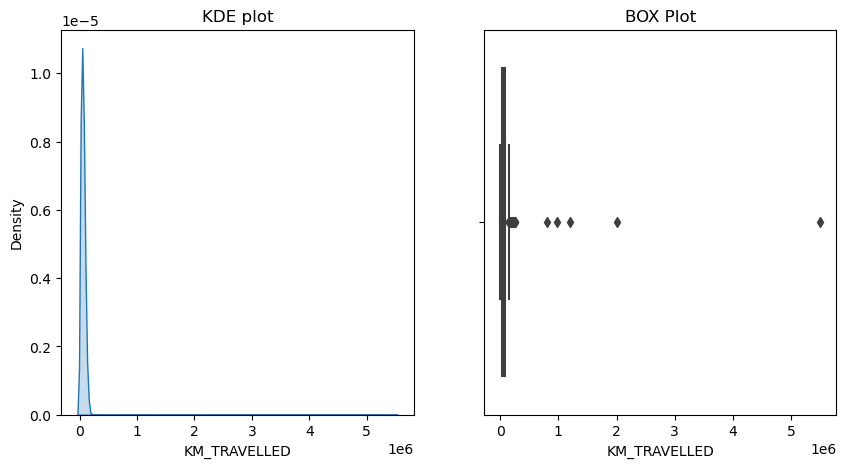

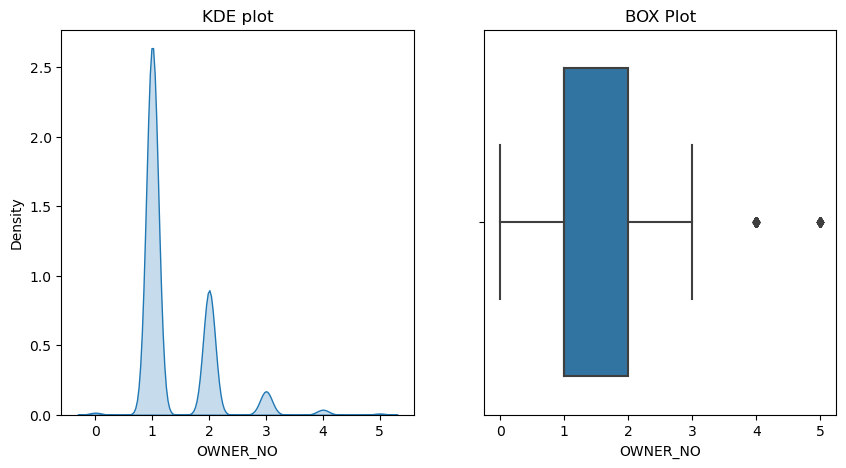

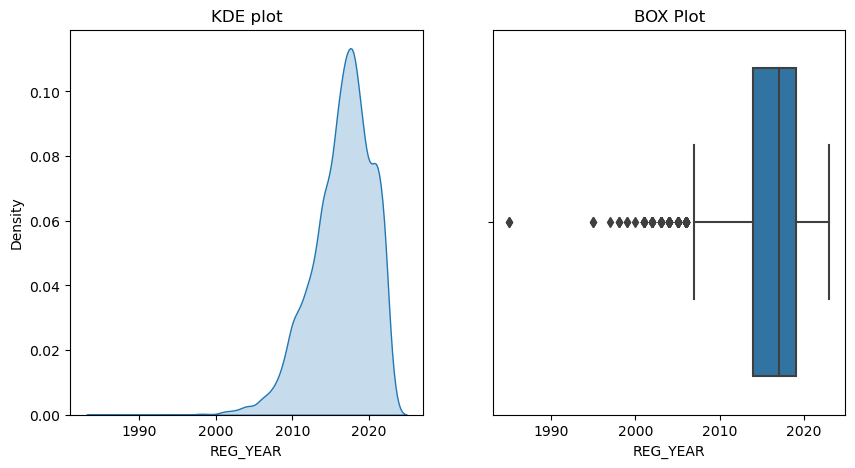

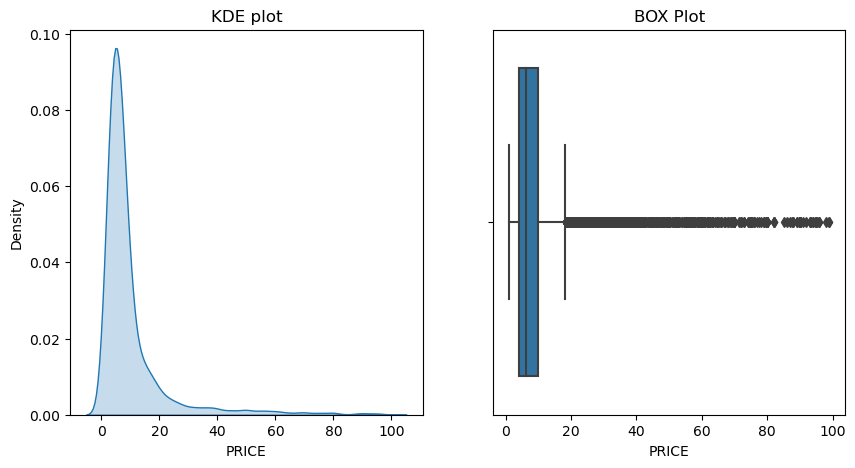

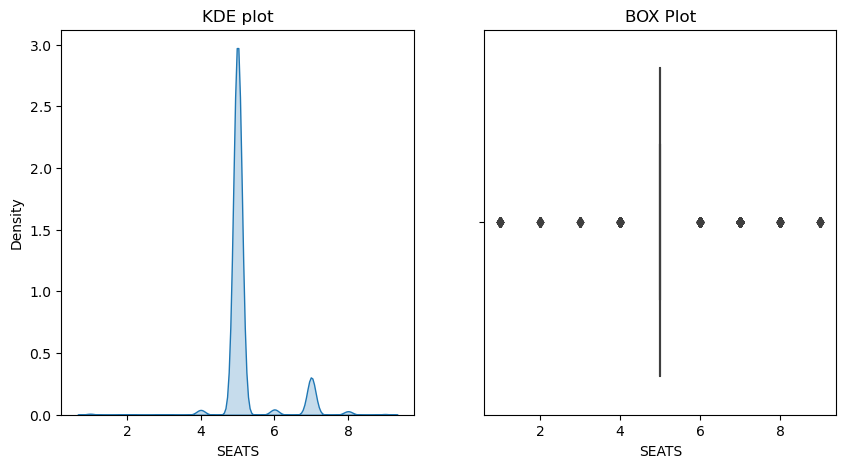

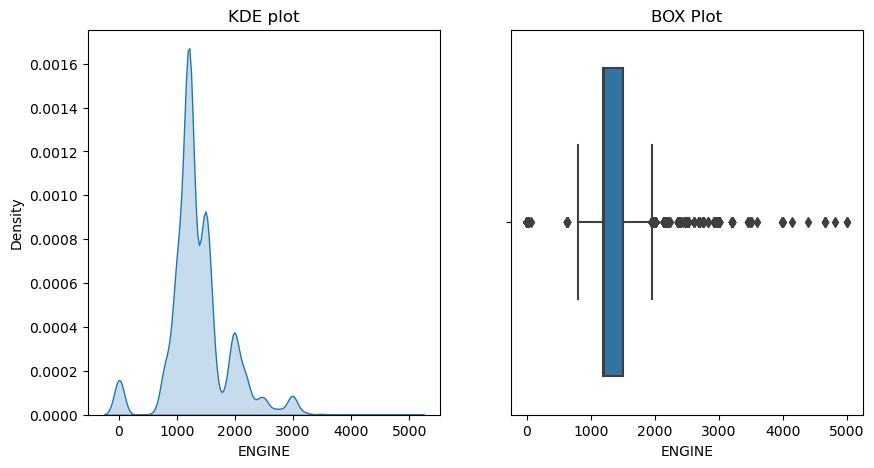

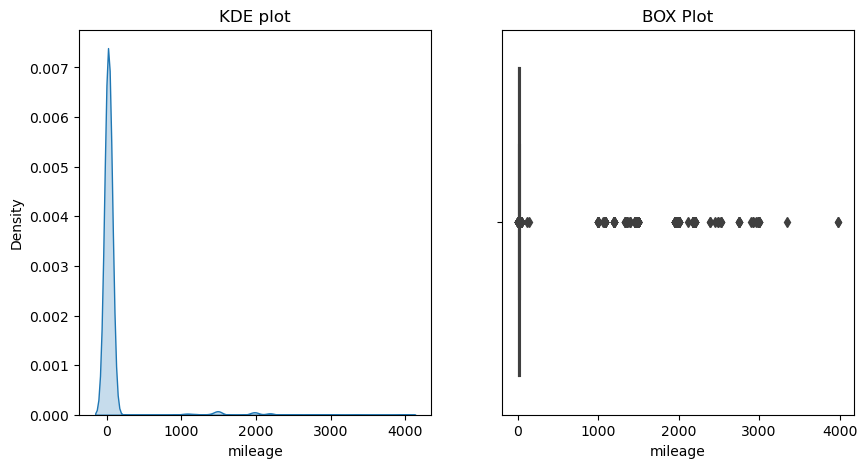

In [24]:
for col in num_columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(df[col], shade=True)
    plt.title('KDE plot')

    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title("BOX Plot")
    plt.show()

In [25]:
# remove outliers using iqr
def outliers(df,col):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper = df[col].quantile(0.75) + (1.5*iqr)
    lower = df[col].quantile(0.25) - (1.5*iqr)
    df[col] = df[col].clip(lower, upper)

In [26]:
num_columns

Index(['KM_TRAVELLED', 'OWNER_NO', 'REG_YEAR', 'PRICE', 'SEATS', 'ENGINE',
       'mileage'],
      dtype='object')

In [27]:
for col in num_columns:
    outliers(df,col)

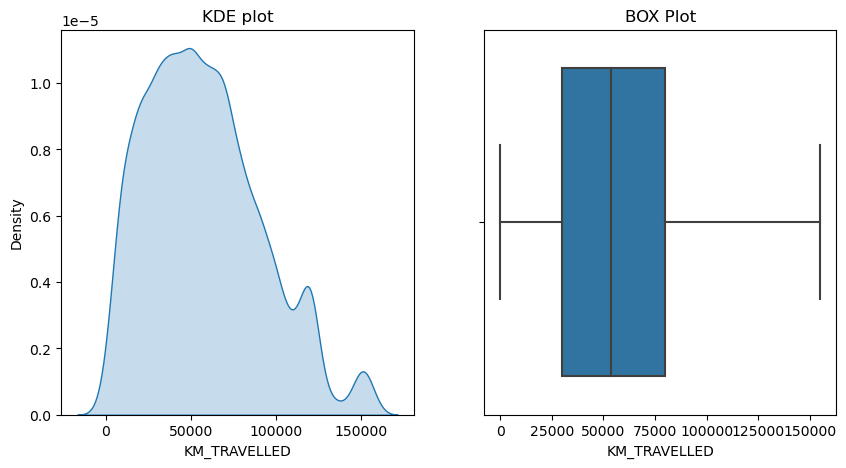

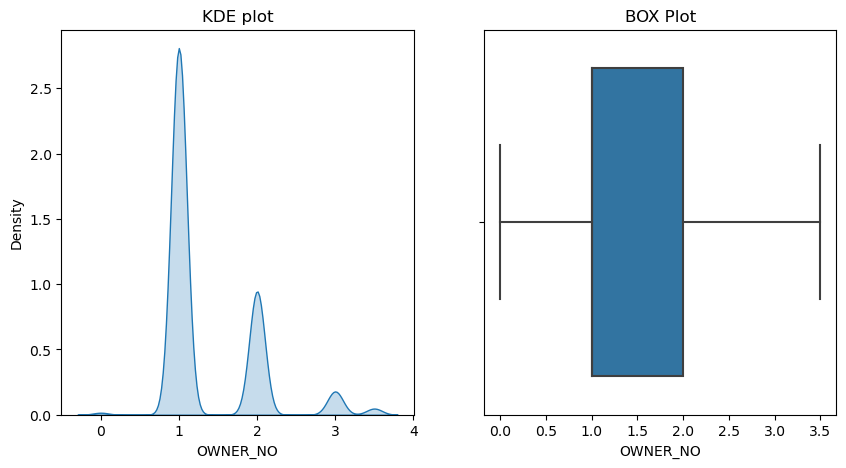

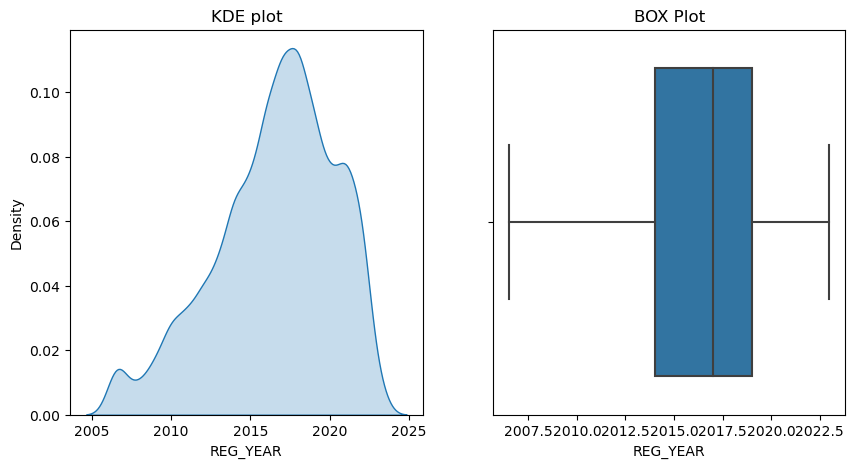

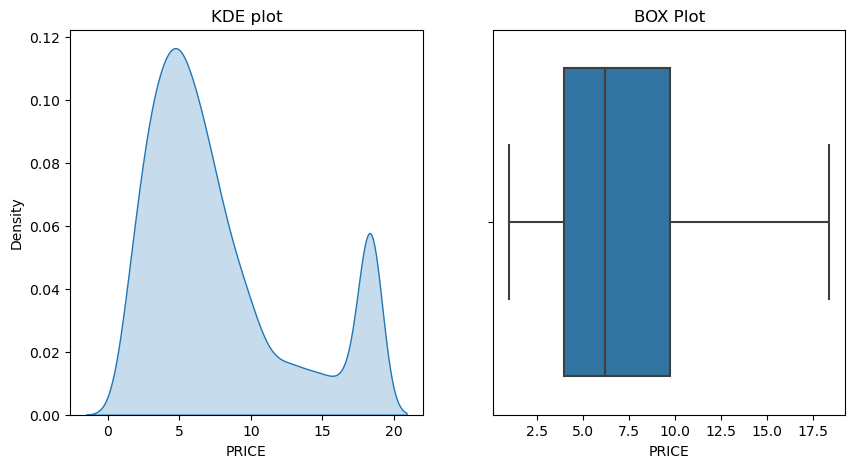

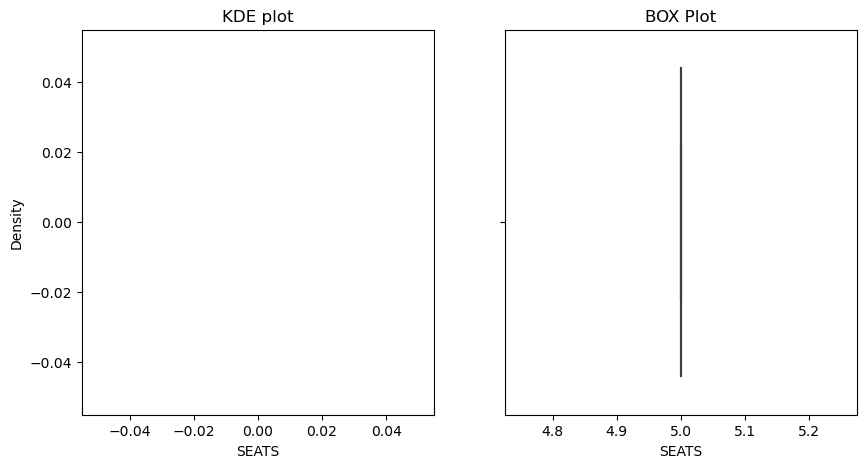

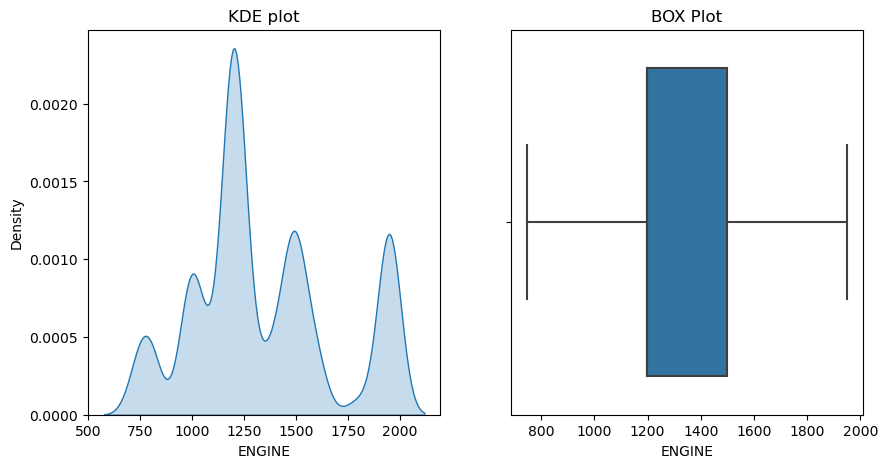

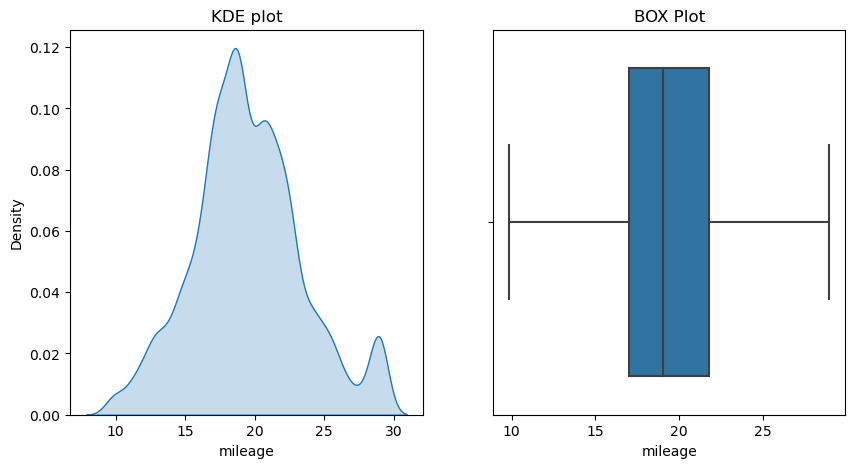

In [28]:
for col in num_columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(df[col], shade=True)
    plt.title('KDE plot')

    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title("BOX Plot")
    plt.show()

In [29]:
# data locks fine, not that skewed

In [30]:
df_original = df.copy()

In [31]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CITY          8369 non-null   object 
 1   OEM           8369 non-null   object 
 2   FUEL          8369 non-null   object 
 3   TYPE          8369 non-null   object 
 4   KM_TRAVELLED  8369 non-null   float64
 5   TRANSMISSION  8369 non-null   object 
 6   OWNER_NO      8369 non-null   float64
 7   MODEL         8369 non-null   object 
 8   REG_YEAR      8369 non-null   float64
 9   PRICE         8369 non-null   float64
 10  INSURANCE     8369 non-null   object 
 11  SEATS         8369 non-null   float64
 12  ENGINE        8369 non-null   float64
 13  mileage       8369 non-null   float64
 14  COLOR         8369 non-null   object 
dtypes: float64(7), object(8)
memory usage: 980.9+ KB


In [50]:
df_original.columns

Index(['CITY', 'OEM', 'FUEL', 'TYPE', 'KM_TRAVELLED', 'TRANSMISSION',
       'OWNER_NO', 'MODEL', 'REG_YEAR', 'PRICE', 'INSURANCE', 'SEATS',
       'ENGINE', 'mileage', 'COLOR'],
      dtype='object')

In [70]:
df_original.loc[2000].values

array(['BANGALORE', 'Toyota', 'Petrol', 'MUV', 10000.0, 'Manual', 1.0,
       'Toyota Innova Crysta', 2021.0, 18.375, 'Third Party insurance',
       5.0, 1949.5, 9.840000000000005, 'others'], dtype=object)

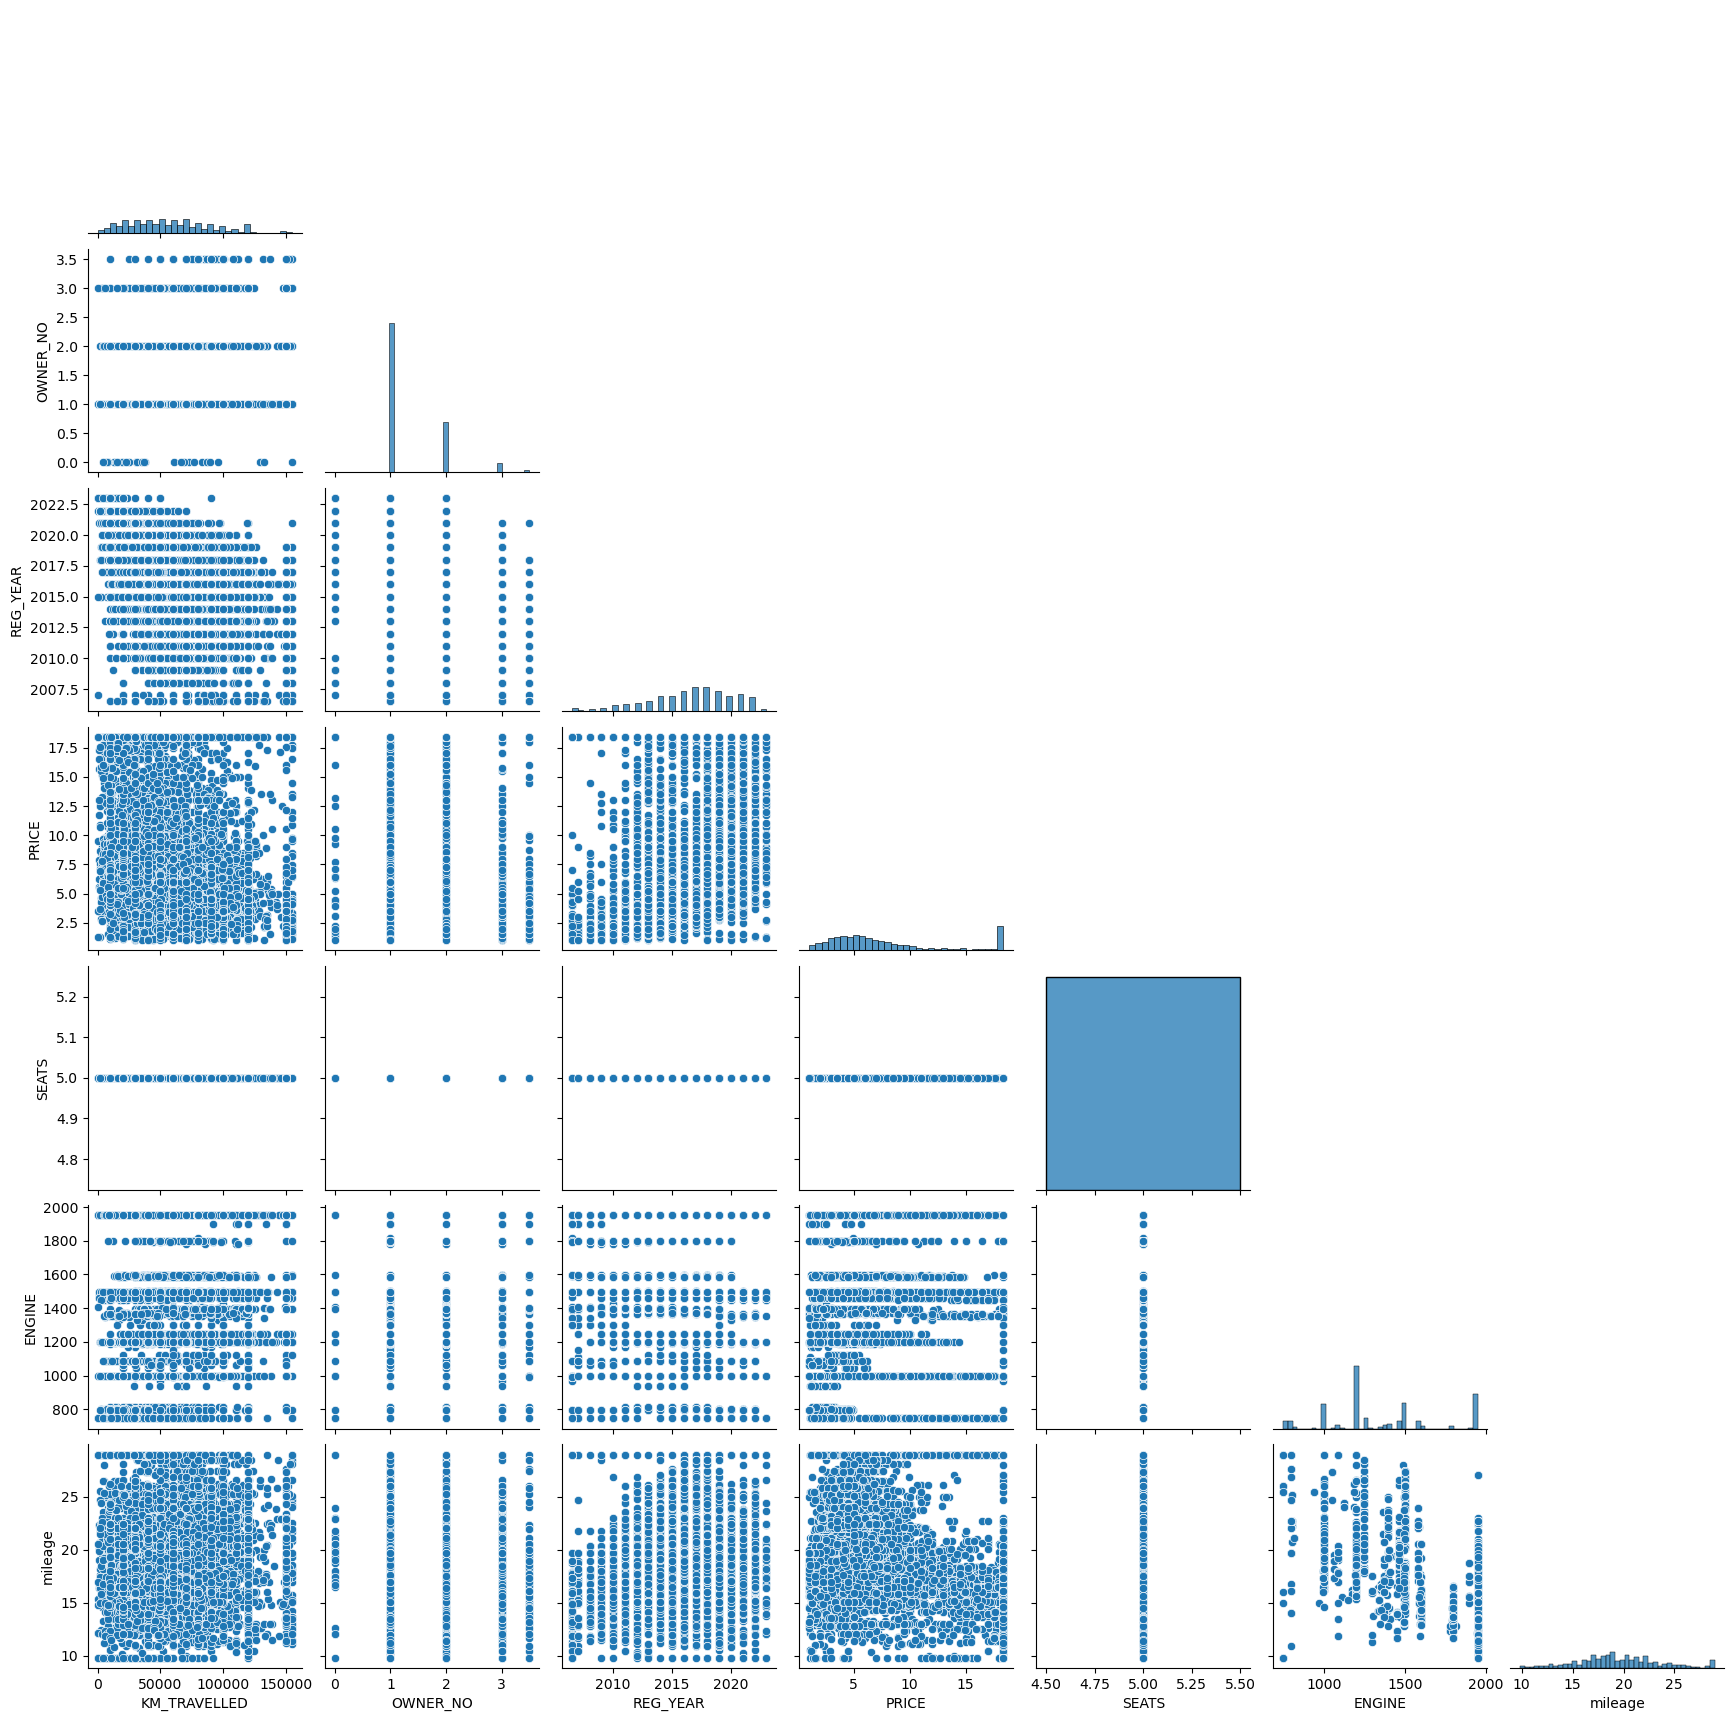

In [32]:
sns.pairplot(df_original, diag_kind='hist', corner=True)
plt.show()

## Encoding

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [34]:
onehot_columns =['CITY' , 'FUEL' , 'TYPE' , 'TRANSMISSION' , 'INSURANCE']
ordinal_col = ['OEM', 'MODEL', 'COLOR']

ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', sparse=False), onehot_columns ), ('ordinal', OrdinalEncoder(), ordinal_col)], remainder='passthrough')
ct.set_output(transform='pandas')
df1 = ct.fit_transform(df)
df1

,onehot__CITY_CHENNAI,onehot__CITY_DELHI,onehot__CITY_HYDERABAD,onehot__CITY_JAIPUR,onehot__CITY_KOLKATA,onehot__FUEL_Diesel,onehot__FUEL_Electric,onehot__FUEL_Lpg,onehot__FUEL_Petrol,onehot__TYPE_Convertibles,...,ordinal__OEM,ordinal__MODEL,ordinal__COLOR,remainder__KM_TRAVELLED,remainder__OWNER_NO,remainder__REG_YEAR,remainder__PRICE,remainder__SEATS,remainder__ENGINE,remainder__mileage
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,30.0,279.0,139.0,70000.0,3.0,2014.0,9.75,5.0,1949.5,19.16
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4.0,39.0,113.0,23981.0,1.0,2017.0,2.66,5.0,799.0,22.70
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,27.0,239.0,14.0,7100.0,1.0,2021.0,5.95,5.0,999.0,19.03
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,9.0,90.0,113.0,71574.0,2.0,2011.0,2.23,5.0,1197.0,17.00
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,7.0,139.0,50000.0,2.0,2014.0,12.00,5.0,1949.5,15.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,27.0,90.0,120000.0,1.0,2011.0,1.08,5.0,1199.0,18.60
8365,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,20.0,154.0,90.0,70000.0,1.0,2007.0,1.05,5.0,796.0,19.70
8366,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,27.0,239.0,90.0,20000.0,1.0,2022.0,8.50,5.0,999.0,19.17
8367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,20.0,154.0,90.0,40000.0,1.0,2009.0,1.00,5.0,796.0,19.70


In [35]:
df1.columns

Index(['onehot__CITY_CHENNAI', 'onehot__CITY_DELHI', 'onehot__CITY_HYDERABAD',
       'onehot__CITY_JAIPUR', 'onehot__CITY_KOLKATA', 'onehot__FUEL_Diesel',
       'onehot__FUEL_Electric', 'onehot__FUEL_Lpg', 'onehot__FUEL_Petrol',
       'onehot__TYPE_Convertibles', 'onehot__TYPE_Coupe',
       'onehot__TYPE_Hatchback', 'onehot__TYPE_Hybrids', 'onehot__TYPE_MUV',
       'onehot__TYPE_Minivans', 'onehot__TYPE_Pickup Trucks',
       'onehot__TYPE_SUV', 'onehot__TYPE_Sedan', 'onehot__TYPE_Wagon',
       'onehot__TRANSMISSION_Manual', 'onehot__INSURANCE_2',
       'onehot__INSURANCE_Comprehensive', 'onehot__INSURANCE_Diesel',
       'onehot__INSURANCE_Electric', 'onehot__INSURANCE_Not Available',
       'onehot__INSURANCE_Petrol', 'onehot__INSURANCE_Third Party',
       'onehot__INSURANCE_Third Party insurance', 'onehot__INSURANCE_Zero Dep',
       'ordinal__OEM', 'ordinal__MODEL', 'ordinal__COLOR',
       'remainder__KM_TRAVELLED', 'remainder__OWNER_NO', 'remainder__REG_YEAR',
       'rem

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   onehot__CITY_CHENNAI                     8369 non-null   float64
 1   onehot__CITY_DELHI                       8369 non-null   float64
 2   onehot__CITY_HYDERABAD                   8369 non-null   float64
 3   onehot__CITY_JAIPUR                      8369 non-null   float64
 4   onehot__CITY_KOLKATA                     8369 non-null   float64
 5   onehot__FUEL_Diesel                      8369 non-null   float64
 6   onehot__FUEL_Electric                    8369 non-null   float64
 7   onehot__FUEL_Lpg                         8369 non-null   float64
 8   onehot__FUEL_Petrol                      8369 non-null   float64
 9   onehot__TYPE_Convertibles                8369 non-null   float64
 10  onehot__TYPE_Coupe                       8369 no

In [ ]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor()

cbr.fit(df1.drop('remainder__PRICE', axis=1),df1['remainder__PRICE'])

In [38]:
print(cbr.best_score_)
cbr.get_all_params()

{'learn': {'RMSE': 1.1605514178007512}}


{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'lear

In [39]:
cbr.feature_names_

['onehot__CITY_CHENNAI',
 'onehot__CITY_DELHI',
 'onehot__CITY_HYDERABAD',
 'onehot__CITY_JAIPUR',
 'onehot__CITY_KOLKATA',
 'onehot__FUEL_Diesel',
 'onehot__FUEL_Electric',
 'onehot__FUEL_Lpg',
 'onehot__FUEL_Petrol',
 'onehot__TYPE_Convertibles',
 'onehot__TYPE_Coupe',
 'onehot__TYPE_Hatchback',
 'onehot__TYPE_Hybrids',
 'onehot__TYPE_MUV',
 'onehot__TYPE_Minivans',
 'onehot__TYPE_Pickup Trucks',
 'onehot__TYPE_SUV',
 'onehot__TYPE_Sedan',
 'onehot__TYPE_Wagon',
 'onehot__TRANSMISSION_Manual',
 'onehot__INSURANCE_2',
 'onehot__INSURANCE_Comprehensive',
 'onehot__INSURANCE_Diesel',
 'onehot__INSURANCE_Electric',
 'onehot__INSURANCE_Not Available',
 'onehot__INSURANCE_Petrol',
 'onehot__INSURANCE_Third Party',
 'onehot__INSURANCE_Third Party insurance',
 'onehot__INSURANCE_Zero Dep',
 'ordinal__OEM',
 'ordinal__MODEL',
 'ordinal__COLOR',
 'remainder__KM_TRAVELLED',
 'remainder__OWNER_NO',
 'remainder__REG_YEAR',
 'remainder__SEATS',
 'remainder__ENGINE',
 'remainder__mileage']

In [48]:
# feature importance
feature_imp = pd.DataFrame(cbr.feature_importances_ , index=cbr.feature_names_ , columns=['importance'])
feature_imp.sort_values('importance', ascending=False)

,importance
remainder__ENGINE,26.861260
remainder__REG_YEAR,26.023365
onehot__TRANSMISSION_Manual,8.638390
ordinal__MODEL,8.268879
remainder__mileage,5.428155
onehot__TYPE_SUV,4.588058
onehot__TYPE_Hatchback,4.547018
remainder__KM_TRAVELLED,3.001085
ordinal__OEM,2.890113
onehot__CITY_KOLKATA,1.679534


In [ ]:
from catboost import CatBoostRegressor

cbr1 = CatBoostRegressor()

cbr1.fit(df1.drop(['remainder__PRICE', 'onehot__INSURANCE_Electric', 'onehot__TYPE_Hybrids', 'remainder__SEATS', 'onehot__INSURANCE_2'], axis=1),df1['remainder__PRICE'])

In [47]:
print(cbr1.best_score_)

{'learn': {'RMSE': 1.1666064153740867}}


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

cbr2 = CatBoostRegressor()
cv = KFold(n_splits=5)
params = { 'iterations': range(500,1500,10),
            'learning_rate': np.linspace(0,0.5,10),
            'depth': range(3,8)}
gcv = GridSearchCV(cbr2, param_grid=params, cv= cv, scoring='neg_mean_squared_error')
gcv.fit(X=df1.drop('remainder__PRICE', axis=1),y=df1['remainder__PRICE'])
print(gcv.best_score_)
print(gcv.best_params_)

In [76]:
input = pd.DataFrame([['BANGALORE', 'Toyota', 'Petrol', 'MUV', 10000.0, 'Manual', 1.0,
       'Toyota Innova Crysta', 2021.0, 18.375, 'Third Party insurance',
       5.0, 1949.5, 9.840000000000005, 'others']]
                     ,columns=['CITY', 'OEM', 'FUEL', 'TYPE', 'KM_TRAVELLED', 'TRANSMISSION',
       'OWNER_NO', 'MODEL', 'REG_YEAR', 'PRICE', 'INSURANCE', 'SEATS',
       'ENGINE', 'mileage', 'COLOR'])

In [77]:
input

,CITY,OEM,FUEL,TYPE,KM_TRAVELLED,TRANSMISSION,OWNER_NO,MODEL,REG_YEAR,PRICE,INSURANCE,SEATS,ENGINE,mileage,COLOR
0,BANGALORE,Toyota,Petrol,MUV,10000.0,Manual,1.0,Toyota Innova Crysta,2021.0,18.375,Third Party insurance,5.0,1949.5,9.84,others


In [78]:
input = ct.transform(input)

In [84]:
cbr.predict(input)[0]

18.523230759976226

In [83]:
import pickle
with open("ct.pkl", 'wb') as f:
    pickle.dump(ct,f)

In [85]:
import pickle
with open("cbr.pkl", 'wb') as f:
    pickle.dump(cbr,f)

In [81]:
df_original.to_json("df.json")

In [44]:
from pycaret.regression import *
setup(data= df1, target='remainder__PRICE')

,Description,Value
0,Session id,3599
1,Target,remainder__PRICE
2,Target type,Regression
3,Original data shape,"(8369, 39)"
4,Transformed data shape,"(8369, 39)"
5,Transformed train set shape,"(5858, 39)"
6,Transformed test set shape,"(2511, 39)"
7,Numeric features,38
8,Preprocess,True
9,Imputation type,simple


In [46]:
compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]